<a href="https://colab.research.google.com/github/aldnoahh/customer_churn_solution_tf_keras/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Problem Solution using Keras and Tensorflow


### Importing the data

In [ ]:
# use these links to do so:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout
from keras.constraints import maxnorm
from keras.layers.normalization import BatchNormalization

In [ ]:
churn = pd.read_csv('/content/Churn.csv')

### Understanding the data

In [ ]:
#showing dataset
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#seeing end of dataset
churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Data Manipulation

In [ ]:
#preprocessing for categorial data
churn.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)
churn.TotalCharges.replace([" "], ["0"], inplace= True)
churn.TotalCharges = churn.TotalCharges.astype(float)
churn.drop("customerID", axis= 1, inplace= True)
churn.Churn.replace(["Yes", "No"], [1, 0], inplace= True)

In [ ]:
churn = pd.get_dummies(churn)

In [ ]:
X = churn.drop("Churn", axis= 1)

In [ ]:
y = churn.Churn

### Data Visualization

In [ ]:
#preprocessed dataframe
churn.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


### Implement Machine Learning Models

In [ ]:
##experimentation with different hyperparameters with fresh instance of model

#tf.keras.backend.clear_session()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=46, activation='relu', kernel_constraint=maxnorm(3)))  #l2 reg
model.add(Dropout(rate=0.2))
#model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from keras import backend as Ke

def recall_m(y_true, y_pred):
    true_positives = Ke.sum(Ke.round(Ke.clip(y_true * y_pred, 0, 1)))
    possible_positives = Ke.sum(Ke.round(Ke.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + Ke.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = Ke.sum(Ke.round(Ke.clip(y_true * y_pred, 0, 1)))
    predicted_positives = Ke.sum(Ke.round(Ke.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + Ke.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+Ke.epsilon()))


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = 'rmsprop', metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=25)

Epoch 1/50
240/240 [==============================] - 6s 9ms/step - loss: 0.6581 - accuracy: 0.6183 - f1_m: 0.2582 - precision_m: 0.3282 - recall_m: 0.3095 - val_loss: 0.5491 - val_accuracy: 0.7701 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
240/240 [==============================] - 1s 6ms/step - loss: 0.5458 - accuracy: 0.7581 - f1_m: 0.3515 - precision_m: 0.6465 - recall_m: 0.2625 - val_loss: 0.4690 - val_accuracy: 0.7909 - val_f1_m: 0.1819 - val_precision_m: 0.5233 - val_recall_m: 0.1160
Epoch 3/50
240/240 [==============================] - 1s 6ms/step - loss: 0.5221 - accuracy: 0.7666 - f1_m: 0.3759 - precision_m: 0.6381 - recall_m: 0.2868 - val_loss: 0.4510 - val_accuracy: 0.7919 - val_f1_m: 0.1905 - val_precision_m: 0.5233 - val_recall_m: 0.1220
Epoch 4/50
240/240 [==============================] - 1s 6ms/step - loss: 0.5131 - accuracy: 0.7670 - f1_m: 0.3997 - precision_m: 0.6210 - recall_m: 0.3156 - val_loss: 0.4513 - val_accuracy:

### Model Evaluation

In [ ]:
result = model.evaluate(X_test,y_test)
dict(zip(model.metrics_names, result))

34/34 [==============================] - 0s 3ms/step - loss: 0.4028 - accuracy: 0.8221 - f1_m: 0.5425 - precision_m: 0.6153 - recall_m: 0.5167


{'accuracy': 0.8221381306648254,
 'f1_m': 0.5424721837043762,
 'loss': 0.4027644991874695,
 'precision_m': 0.6152693033218384,
 'recall_m': 0.5167007446289062}

### Final Conclusions

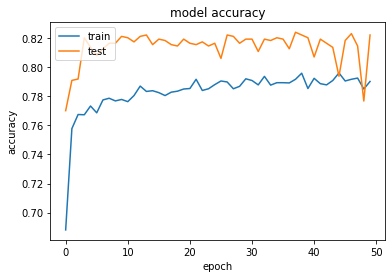

In [ ]:
##  while the model maybe accurate to upto certain mark, but due to high amount of variable features and very limited dataset size,
##  the accuracy is not peaking.

#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

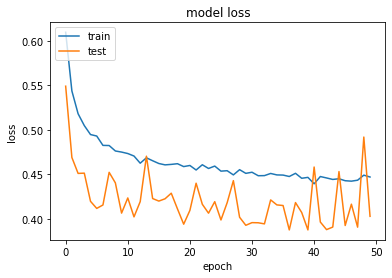

In [ ]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

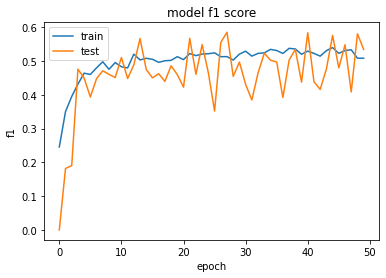

In [ ]:
# f1_score
plt.plot(history.history['f1_m'], label='train f1_m')
plt.plot(history.history['val_f1_m'], label='val f1_m')
plt.title('model f1 score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

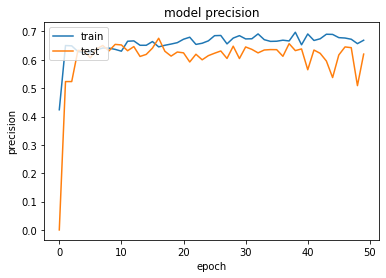

In [ ]:
# precision
plt.plot(history.history['precision_m'], label='train precision_m')
plt.plot(history.history['val_precision_m'], label='val precision_m')
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

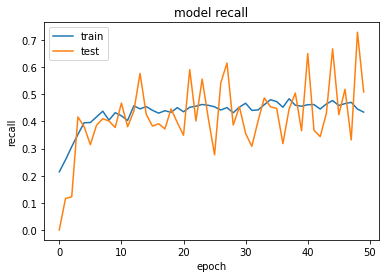

In [ ]:
# recall
plt.plot(history.history['recall_m'], label='train recall_m')
plt.plot(history.history['val_recall_m'], label='val recall_m')
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()